In [65]:
%matplotlib inline
import pandas as pd

In [66]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [67]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [68]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [26]:
# Define a year as a "Superman year" whose films feature more Superman characters than Batman
c = cast
c = c[(c.character == 'Superman') | (c.character == 'Batman')]
c = c.groupby(['year','character']).size()
c = c.unstack().fillna(0)
c.head()

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1948,0.0,1.0
1949,2.0,0.0


In [30]:
# Number of years in film history that have been "Superman Years"
d = c.Superman - c.Batman
print("Superman Years:")
print(len(d[d > 0.0]))

Superman Years:
12


### How many years have been "Batman years", with more Batman characters than Superman characters?

In [29]:
# Number of years that have been "Batman years"
e = c.Batman - c.Superman
print ("Batman Years:")
print(len(e[e > 0.0]))

Batman Years:
24


### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

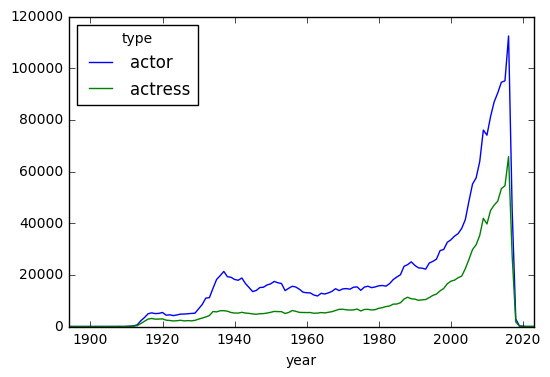

In [41]:
# Plot number of actor roles each year and number of actress roles each year
c = cast
c = c.groupby(['year','type']).size()
c = c.unstack().fillna(0)
c.plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

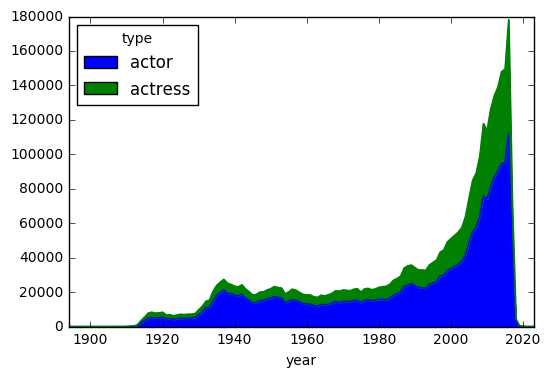

In [42]:
# Plot number of actor and actress roles each year with kind = 'area'
c = cast
c = c.groupby(['year','type']).size()
c = c.unstack().fillna(0)
c.plot(kind = 'area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

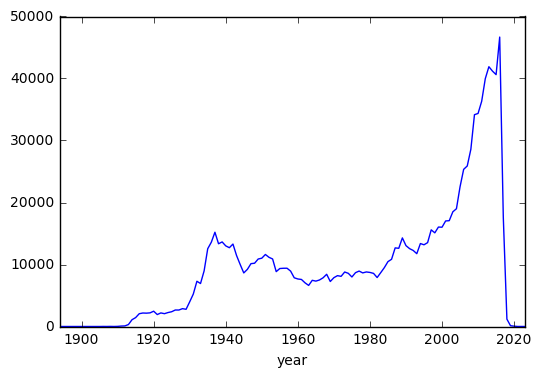

In [47]:
# Plot difference between number of actor roles each year and number of actress roles each year
c = cast
c = c.groupby(['year','type']).size()
c = c.unstack('type').fillna(0)
d = c.actor - c.actress
d.plot()

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

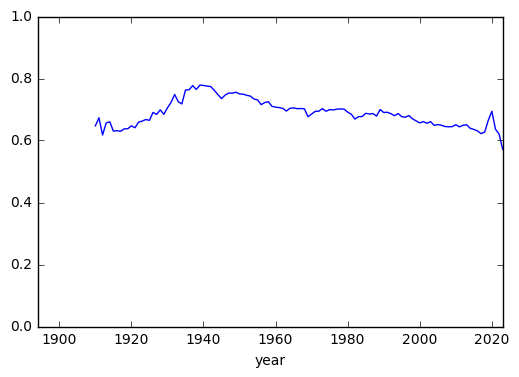

In [50]:
# Plot the fraction of roles that have been 'actor' roles each year
c = cast
c = c.groupby(['year','type']).size()
c = c.unstack('type')
d = (c.actor / (c.actor + c.actress))
d.plot(ylim=[0,1])

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

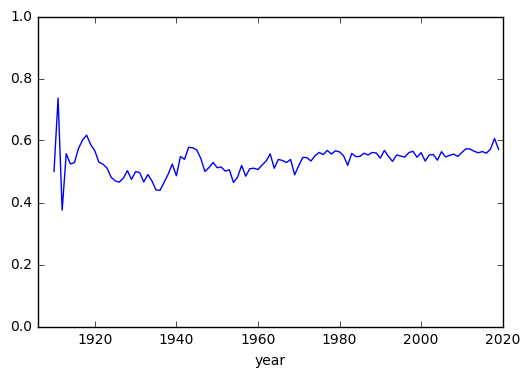

In [69]:
# Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year
c = cast
c = c[c.n == 2]
c = c.groupby(['year','type']).size()
c = c.unstack('type')
d = (c.actor / (c.actor + c.actress))
d.plot(ylim=[0,1])

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

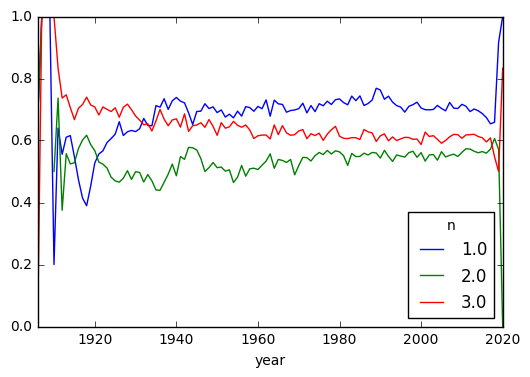

In [77]:
# Build a plot with a line for each rank n=1 through n=3, 
# where the line shows what fraction of that rank's roles 
# were 'actor' roles for each year in the history of film

c = cast
c = c[c.n <= 3]
c = c.groupby(['year','type','n']).size()
c = c.unstack('type').fillna(0)
d = (c.actor / (c.actor + c.actress))
d = d.unstack('n')
d.plot(ylim=[0,1])